In [49]:

pip install seaborn

You should consider upgrading via the '/usr/local/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

In [51]:
customers = pd.read_csv('customer_info.csv')
sales = pd.read_csv('sales_data.csv')
products = pd.read_csv('product_info.csv')

In [52]:
print(sales['delivery_status'].unique())
print(sales['payment_method'].unique())
print(sales['region'].unique())

print(products['base_price'].unique())

print(customers['gender'].unique())
print(customers['region'].unique())
print(customers['loyalty_tier'].unique())

['Delivered' ' DELAYED' 'delivered' ' Cancelled ' 'Delayed' 'delrd'
 'delyd' nan]
['PayPal' 'credit card' 'Bank Transfer' 'Credit Card' nan 'bank transfr']
['Central' 'North' 'West' 'East' 'South' 'nrth']
[15.88 34.23  7.92  9.13 31.1  36.06 33.63 31.96  8.   17.72 11.08 14.67
 36.52 13.22 39.21 26.71 16.46  6.08 30.3  30.27 20.23 19.77 36.04 26.33
 15.24 27.06 23.05 34.28 23.41  9.77]
['Male' 'Female' 'male' 'FEMALE' 'Other' 'femle' nan]
['Central' 'West' 'North' 'South' 'East' nan]
['Silver' ' gold ' 'GOLD' 'bronze' 'gld' nan 'brnze' 'sllver']


In [53]:
spellingMap = {
    'delrd': 'Delivered',
    'delyd': 'Delayed',
    'bank transfr': 'Bank Transfer',
    'nrth': 'North',
    'gld': 'Gold',
    'brnze': 'Bronze',
    'sllver': 'Silver',
    'femle': 'Female'
}

sales['delivery_status'] = sales['delivery_status'].replace(spellingMap)
sales['payment_method'] = sales['payment_method'].replace(spellingMap)
sales['region'] = sales['region'].replace(spellingMap)
customers['loyalty_tier'] = customers['loyalty_tier'].replace(spellingMap)
customers['gender'] = customers['gender'].replace(spellingMap)

sales['delivery_status'] = sales['delivery_status'].str.title().str.strip()
sales['payment_method'] = sales['payment_method'].str.title().str.strip()

customers['gender'] = customers['gender'].str.title().str.strip()
customers['loyalty_tier'] = customers['loyalty_tier'].str.title().str.strip()

In [54]:
customers['gender'] = customers['gender'].replace(np.nan, 'Other')

In [55]:
print(sales['delivery_status'].unique())
print(sales['payment_method'].unique())
print(sales['region'].unique())

print(products['base_price'].unique())

print(customers['gender'].unique())
print(customers['region'].unique())
print(customers['loyalty_tier'].unique())

['Delivered' 'Delayed' 'Cancelled' nan]
['Paypal' 'Credit Card' 'Bank Transfer' nan]
['Central' 'North' 'West' 'East' 'South']
[15.88 34.23  7.92  9.13 31.1  36.06 33.63 31.96  8.   17.72 11.08 14.67
 36.52 13.22 39.21 26.71 16.46  6.08 30.3  30.27 20.23 19.77 36.04 26.33
 15.24 27.06 23.05 34.28 23.41  9.77]
['Male' 'Female' 'Other']
['Central' 'West' 'North' 'South' 'East' nan]
['Silver' 'Gold' 'Bronze' nan]


In [56]:
products['launch_date'] = pd.to_datetime(products['launch_date'], errors='coerce')
customers['signup_date'] = pd.to_datetime(customers['signup_date'], errors='coerce')
sales['order_date'] = pd.to_datetime(sales['order_date'], errors='coerce')

print(products['launch_date'].info())
print(customers['signup_date'].info())
print(sales['order_date'].info())

<class 'pandas.core.series.Series'>
RangeIndex: 30 entries, 0 to 29
Series name: launch_date
Non-Null Count  Dtype         
--------------  -----         
30 non-null     datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 368.0 bytes
None
<class 'pandas.core.series.Series'>
RangeIndex: 500 entries, 0 to 499
Series name: signup_date
Non-Null Count  Dtype         
--------------  -----         
496 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 4.0 KB
None
<class 'pandas.core.series.Series'>
RangeIndex: 3000 entries, 0 to 2999
Series name: order_date
Non-Null Count  Dtype         
--------------  -----         
2998 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 23.6 KB
None


/var/folders/fx/2509wmcj7bdfhyq38v8214_c0000gn/T/ipykernel_99517/2873875731.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  sales['order_date'] = pd.to_datetime(sales['order_date'], errors='coerce')


In [57]:
print("Sales: \n",sales.isna().sum())
print("Customers: \n", customers.isna().sum())
print("Products: \n", products.isna().sum())

Sales: 
 order_id              1
customer_id           2
product_id            5
quantity              3
unit_price            1
order_date            2
delivery_status       3
payment_method        3
region                0
discount_applied    517
dtype: int64
Customers: 
 customer_id     3
email           6
signup_date     4
gender          0
region          3
loyalty_tier    2
dtype: int64
Products: 
 product_id       0
product_name     0
category         0
launch_date      0
base_price       0
supplier_code    0
dtype: int64


In [58]:
print(sales['discount_applied'].unique())

[0.   0.15 0.2  0.1  0.05  nan]


In [59]:
sales['discount_applied'] = sales['discount_applied'].replace(np.nan, 0.0)
print(sales['discount_applied'].unique())

[0.   0.15 0.2  0.1  0.05]


In [60]:
print(sales['quantity'].unique())

['3' '5' '1' '2' '4' nan 'three' 'five']


In [61]:
quantityMap = {
    'three': '3',
    'five': '5',
    np.nan: '0'
}
sales['quantity'] = sales['quantity'].replace(quantityMap)
print(sales['quantity'].unique())

['3' '5' '1' '2' '4' '0']


In [62]:
customers['loyalty_tier'] = customers['loyalty_tier'].replace(np.nan, "None")
print(customers['loyalty_tier'].unique())

['Silver' 'Gold' 'Bronze' 'None']


In [63]:
print("Sales: \n",sales.isna().sum())
print("Customers: \n", customers.isna().sum())
print("Products: \n", products.isna().sum())

Sales: 
 order_id            1
customer_id         2
product_id          5
quantity            0
unit_price          1
order_date          2
delivery_status     3
payment_method      3
region              0
discount_applied    0
dtype: int64
Customers: 
 customer_id     3
email           6
signup_date     4
gender          0
region          3
loyalty_tier    0
dtype: int64
Products: 
 product_id       0
product_name     0
category         0
launch_date      0
base_price       0
supplier_code    0
dtype: int64


In [64]:
sales['payment_method'] = sales['payment_method'].replace(np.nan, "Other")
print(sales['payment_method'].unique())

['Paypal' 'Credit Card' 'Bank Transfer' 'Other']


In [65]:
print("Sales: ", sales.duplicated(subset='order_id').sum())
print("Customers: ", customers.duplicated(subset='customer_id').sum())
print("Products: ", products.duplicated(subset='product_id').sum())

Sales:  2
Customers:  2
Products:  0


In [66]:
sales = sales.drop_duplicates(subset='order_id')
customers = customers.drop_duplicates(subset='customer_id')

print("Sales: ", sales.duplicated(subset='order_id').sum())
print("Customers: ", customers.duplicated(subset='customer_id').sum())

Sales:  0
Customers:  0


In [67]:
print(sales['quantity'].unique())
print(sales['unit_price'].unique())
print(sales['discount_applied'].unique())


['3' '5' '1' '2' '4' '0']
[39.25 18.92 29.68 ... 43.4  34.04 43.23]
[0.   0.15 0.2  0.1  0.05]


In [68]:
print(sales['unit_price'].where(sales['unit_price'] <= 0.0).sum())

0.0


In [69]:
sales['quantity'] = pd.to_numeric(sales['quantity'], errors='coerce')
print(sales['quantity'].info)

<bound method Series.info of 0       3
1       5
2       1
3       1
4       1
       ..
2995    5
2996    4
2997    1
2998    5
2999    3
Name: quantity, Length: 2998, dtype: int64>


In [70]:
sales = sales.dropna()
customers = customers.dropna()

print("Sales: \n",sales.isna().sum())
print("Customers: \n", customers.isna().sum())
print("Products: \n", products.isna().sum())

Sales: 
 order_id            0
customer_id         0
product_id          0
quantity            0
unit_price          0
order_date          0
delivery_status     0
payment_method      0
region              0
discount_applied    0
dtype: int64
Customers: 
 customer_id     0
email           0
signup_date     0
gender          0
region          0
loyalty_tier    0
dtype: int64
Products: 
 product_id       0
product_name     0
category         0
launch_date      0
base_price       0
supplier_code    0
dtype: int64


In [71]:
sales_product = pd.merge(sales, products, on="product_id")
merged_df = pd.merge(sales_product, customers, on="customer_id", how="left")

print(merged_df.info)
print("\n\n")
print(merged_df.head())

<bound method DataFrame.info of      order_id customer_id product_id  quantity  unit_price order_date  \
0     O966977      C00397      P0022         3       39.25 2025-06-07   
1     O490023      C00285      P0022         2        9.98 2025-07-20   
2     O865247      C00249      P0022         5       30.92 2025-07-22   
3     O121091      C00276      P0022         4       12.88 2025-07-27   
4     O508604      C00331      P0022         1       14.60 2025-10-07   
...       ...         ...        ...       ...         ...        ...   
2979  O312502      C00191      P0008         5       43.93 2025-04-06   
2980  O481013      C00062      P0008         5       21.10 2025-02-06   
2981  O382835      C00294      P0008         2       20.90 2025-05-26   
2982  O701716      C00049      P0008         1       21.68 2025-05-13   
2983  O310112      C00392      P0008         1       45.88 2025-05-30   

     delivery_status payment_method region_x  discount_applied  \
0          Delivered     

In [72]:
merged_df = merged_df.dropna()
merged_df.drop(columns='region_x', inplace=True)
print(merged_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2890 entries, 0 to 2983
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          2890 non-null   object        
 1   customer_id       2890 non-null   object        
 2   product_id        2890 non-null   object        
 3   quantity          2890 non-null   int64         
 4   unit_price        2890 non-null   float64       
 5   order_date        2890 non-null   datetime64[ns]
 6   delivery_status   2890 non-null   object        
 7   payment_method    2890 non-null   object        
 8   discount_applied  2890 non-null   float64       
 9   product_name      2890 non-null   object        
 10  category          2890 non-null   object        
 11  launch_date       2890 non-null   datetime64[ns]
 12  base_price        2890 non-null   float64       
 13  supplier_code     2890 non-null   object        
 14  email             2890 n

In [73]:
merged_df = merged_df.rename(columns={'region_y': 'region'})
print(merged_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2890 entries, 0 to 2983
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          2890 non-null   object        
 1   customer_id       2890 non-null   object        
 2   product_id        2890 non-null   object        
 3   quantity          2890 non-null   int64         
 4   unit_price        2890 non-null   float64       
 5   order_date        2890 non-null   datetime64[ns]
 6   delivery_status   2890 non-null   object        
 7   payment_method    2890 non-null   object        
 8   discount_applied  2890 non-null   float64       
 9   product_name      2890 non-null   object        
 10  category          2890 non-null   object        
 11  launch_date       2890 non-null   datetime64[ns]
 12  base_price        2890 non-null   float64       
 13  supplier_code     2890 non-null   object        
 14  email             2890 n

Task 4: Feature Engineering

In [74]:
merged_df['revenue'] = merged_df['quantity'] * merged_df['unit_price']*(1-merged_df['discount_applied'])
merged_df['order_week'] = merged_df['order_date'].dt.isocalendar().week
merged_df['price_band'] = merged_df['unit_price'].apply(lambda x: 'Medium' if 15<x<30 else ('Low' if x<15 else 'High'))
merged_df['days_to_order'] = merged_df['order_date'] - merged_df['launch_date']
merged_df['email_domain'] = merged_df['email'].str.split('@').str[1]
merged_df['is_late'] = merged_df['delivery_status'].apply(lambda x: 'True' if x == 'Delayed' else 'False')
print(merged_df.head())

  order_id customer_id product_id  quantity  unit_price order_date  \
0  O966977      C00397      P0022         3       39.25 2025-06-07   
1  O490023      C00285      P0022         2        9.98 2025-07-20   
2  O865247      C00249      P0022         5       30.92 2025-07-22   
3  O121091      C00276      P0022         4       12.88 2025-07-27   
4  O508604      C00331      P0022         1       14.60 2025-10-07   

  delivery_status payment_method  discount_applied         product_name  ...  \
0       Delivered         Paypal               0.0  Cleaning Product 86  ...   
1       Delivered    Credit Card               0.0  Cleaning Product 86  ...   
2         Delayed    Credit Card               0.1  Cleaning Product 86  ...   
3       Cancelled    Credit Card               0.2  Cleaning Product 86  ...   
4       Cancelled  Bank Transfer               0.2  Cleaning Product 86  ...   

  signup_date  gender   region loyalty_tier  revenue order_week price_band  \
0  2024-08-09  Femal

In [75]:
print(merged_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2890 entries, 0 to 2983
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype          
---  ------            --------------  -----          
 0   order_id          2890 non-null   object         
 1   customer_id       2890 non-null   object         
 2   product_id        2890 non-null   object         
 3   quantity          2890 non-null   int64          
 4   unit_price        2890 non-null   float64        
 5   order_date        2890 non-null   datetime64[ns] 
 6   delivery_status   2890 non-null   object         
 7   payment_method    2890 non-null   object         
 8   discount_applied  2890 non-null   float64        
 9   product_name      2890 non-null   object         
 10  category          2890 non-null   object         
 11  launch_date       2890 non-null   datetime64[ns] 
 12  base_price        2890 non-null   float64        
 13  supplier_code     2890 non-null   object         
 14  email   

In [76]:
print(merged_df.isna().sum())

order_id            0
customer_id         0
product_id          0
quantity            0
unit_price          0
order_date          0
delivery_status     0
payment_method      0
discount_applied    0
product_name        0
category            0
launch_date         0
base_price          0
supplier_code       0
email               0
signup_date         0
gender              0
region              0
loyalty_tier        0
revenue             0
order_week          0
price_band          0
days_to_order       0
email_domain        0
is_late             0
dtype: int64


Task 5: Summary Tables

In [77]:
#Weekly revenue trends

pivot = merged_df.pivot_table(values="revenue", index="order_week", columns="region", aggfunc="sum", fill_value=0)
print(pivot)

region        Central       East      North      South       West
order_week                                                       
1            421.3930     0.0000   154.4195     0.0000     0.0000
2           1976.7130  1673.0420   660.4310  1761.0975  1783.6370
6           1139.7875  3030.0035  1160.4295   983.0515  1366.2310
10          1699.4395  1144.6740  2317.2260  1070.6520  1310.3380
14           721.2250   552.5325   801.9220   685.6430   635.7050
15           824.9270   385.2110   522.3850  1002.5350  1150.9855
16           310.4665   193.8475     0.0000     0.0000   234.5725
17             0.0000   211.0650    98.9510     7.7580   160.5565
18            33.8580    17.4250    20.9760   135.1010    99.6240
19          1602.9485  1739.7020  1360.6885  1505.1085  1009.9315
20          1094.8390  1649.4640  1456.5005  2144.7835  1148.4785
21          1579.9820  2440.1035  2256.0820  1961.7990  3101.3190
22          2955.5485  2279.4145  2842.4215  1940.8670  2264.1715
23        

In [78]:
#Product category performance

summary = merged_df.groupby('category')['revenue'].agg(['mean', 'max', 'min', 'count'])
print(summary)

quantity = merged_df.groupby('category')['quantity'].agg(['mean', 'max', 'min', 'count'])
print('\n\nQuantity: \n', quantity)

discount = merged_df.groupby('category')['discount_applied'].agg(['mean', 'max', 'min', 'count'])
print('\n\nDiscount: \n', discount)

                    mean     max    min  count
category                                      
Cleaning       77.791513  248.30  0.000   1165
Kitchen        84.817782  249.15  7.758    396
Outdoors       79.731162  247.55  6.800    487
Personal Care  82.413921  248.10  8.208    286
Storage        81.695269  249.35  0.000    556


Quantity: 
                    mean  max  min  count
category                                
Cleaning       2.982833    5    0   1165
Kitchen        3.058081    5    1    396
Outdoors       3.016427    5    1    487
Personal Care  2.986014    5    1    286
Storage        3.012590    5    0    556


Discount: 
                    mean  max  min  count
category                                
Cleaning       0.085579  0.2  0.0   1165
Kitchen        0.076263  0.2  0.0    396
Outdoors       0.082033  0.2  0.0    487
Personal Care  0.087063  0.2  0.0    286
Storage        0.081295  0.2  0.0    556


In [79]:
#Customer behaviour

behaviour = merged_df.groupby('loyalty_tier')['signup_date'].count()
print(behaviour)

loyalty_tier
Bronze     597
Gold      1637
None         9
Silver     647
Name: signup_date, dtype: int64


In [80]:
#Delivery performance

performance = merged_df.groupby(['region', 'price_band', 'delivery_status'])['delivery_status'].count()
print(performance)

region   price_band  delivery_status
Central  High        Cancelled           36
                     Delayed            101
                     Delivered          105
         Low         Cancelled           22
                     Delayed             34
                     Delivered           33
         Medium      Cancelled           48
                     Delayed             90
                     Delivered           81
East     High        Cancelled           52
                     Delayed            104
                     Delivered          122
         Low         Cancelled           22
                     Delayed             33
                     Delivered           43
         Medium      Cancelled           38
                     Delayed             70
                     Delivered          107
North    High        Cancelled           60
                     Delayed            113
                     Delivered          123
         Low         Cancelled         

In [81]:
payment = merged_df.groupby(['loyalty_tier','payment_method'])['loyalty_tier'].count()
print(payment)

loyalty_tier  payment_method
Bronze        Bank Transfer     172
              Credit Card       269
              Paypal            156
Gold          Bank Transfer     396
              Credit Card       823
              Other               2
              Paypal            416
None          Credit Card         6
              Paypal              3
Silver        Bank Transfer     187
              Credit Card       300
              Other               1
              Paypal            159
Name: loyalty_tier, dtype: int64


In [82]:
revenue = merged_df.groupby(['region', 'category'])['revenue'].sum()
print(revenue)

region   category     
Central  Cleaning         15522.5560
         Kitchen           6579.8880
         Outdoors          7328.3445
         Personal Care     3862.7075
         Storage           9491.8780
East     Cleaning         20178.8245
         Kitchen           7072.1705
         Outdoors          7416.9955
         Personal Care     4992.9585
         Storage           8709.4045
North    Cleaning         19563.5465
         Kitchen           7344.3970
         Outdoors          8741.4975
         Personal Care     4851.9200
         Storage           7837.6090
South    Cleaning         15984.3165
         Kitchen           7164.7470
         Outdoors          6531.7420
         Personal Care     5188.2720
         Storage           9486.6965
West     Cleaning         19377.8695
         Kitchen           5426.6390
         Outdoors          8810.4965
         Personal Care     4674.5235
         Storage           9896.9815
Name: revenue, dtype: float64


In [83]:
loyalty = merged_df.groupby('loyalty_tier')['revenue'].sum()
print(loyalty)

loyalty_tier
Bronze     46746.7470
Gold      133270.8630
None         767.2730
Silver     51252.0985
Name: revenue, dtype: float64


Task 6: Visual Exploration

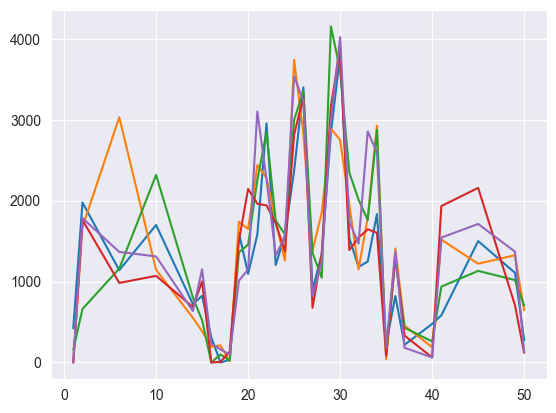

In [84]:
plt.plot(pivot)

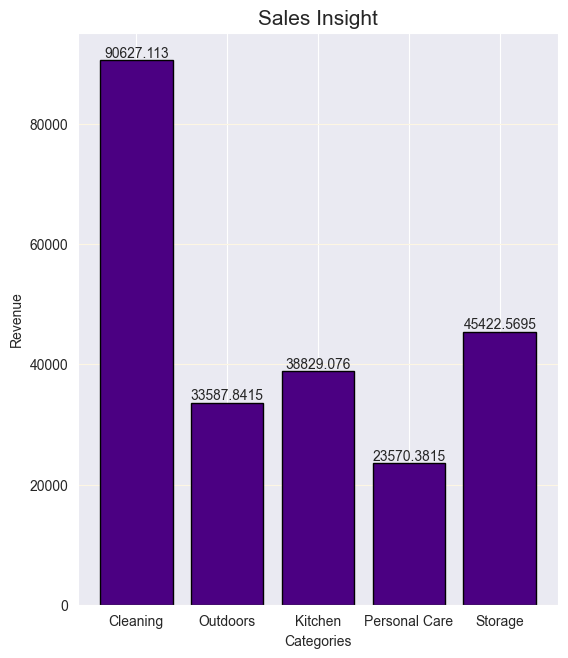

In [85]:
categories = merged_df['category'].unique()
values = merged_df.groupby('category')['revenue'].sum()
fig, ax = plt.subplots(figsize=(6, 4))
bars = ax.bar(categories, values, color='indigo', edgecolor='black')
ax.set_title('Sales Insight', fontsize=15)
ax.set_xlabel('Categories')
ax.set_ylabel('Revenue')

ax.grid(True, axis='y', color='#fdf6e3')

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x()+bar.get_width()/2, height+1, f'{height}', ha='center', va='bottom', fontsize=10)
    
plt.subplots_adjust(left=0.15, right=0.95, top=1.58, bottom=0.15)
plt.show()


/var/folders/fx/2509wmcj7bdfhyq38v8214_c0000gn/T/ipykernel_99517/3225635003.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_df, x='quantity', y='discount_applied', hue=None, palette='pastel')


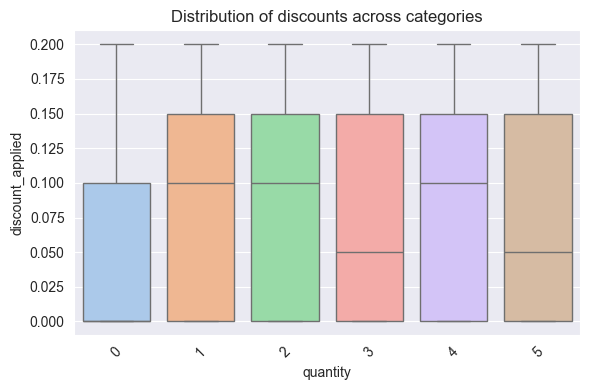

In [86]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=merged_df, x='quantity', y='discount_applied', hue=None, palette='pastel')
plt.title('Distribution of discounts across categories')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

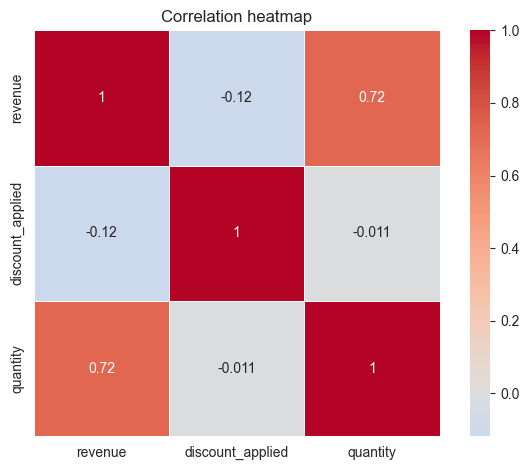

In [87]:
corr = merged_df[['revenue', 'discount_applied', 'quantity']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5, center=0, square=True)
plt.title('Correlation heatmap')
plt.tight_layout()
plt.show()

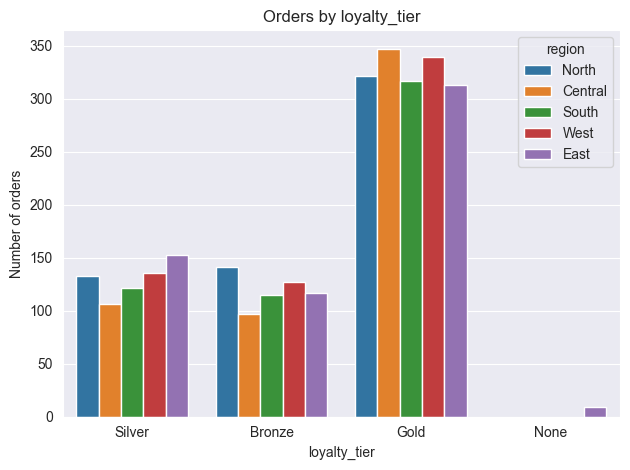

In [88]:
sns.countplot(x='loyalty_tier', data=merged_df, hue='region')
plt.ylabel('Number of orders')
plt.title('Orders by loyalty_tier')
plt.tight_layout()
plt.show()

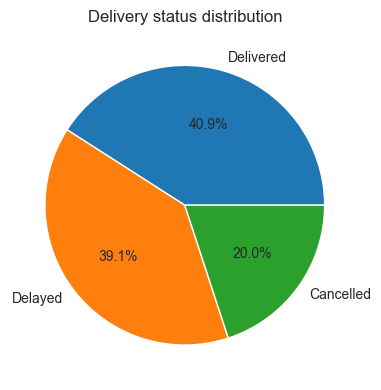

In [89]:
data = merged_df['delivery_status'].value_counts()
plt.figure(figsize=(6, 4))
plt.pie(data, labels=data.index, autopct='%1.1f%%')
plt.title("Delivery status distribution")
plt.tight_layout()
plt.show()

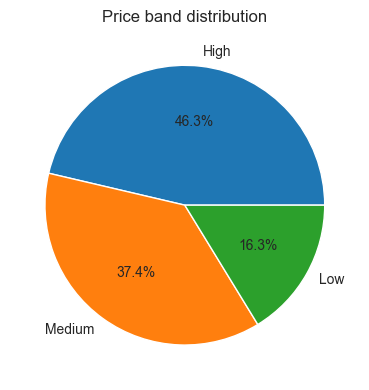

In [90]:
data = merged_df['price_band'].value_counts()
plt.figure(figsize=(6, 4))
plt.pie(data, labels=data.index, autopct='%1.1f%%')
plt.title("Price band distribution")
plt.tight_layout()
plt.show()

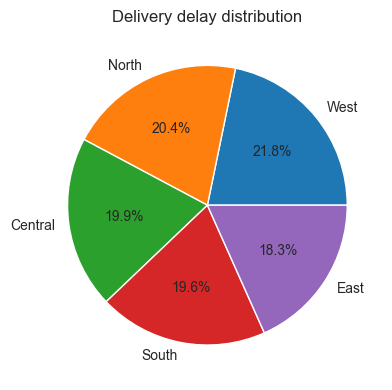

In [91]:
data = merged_df['region'].where(merged_df['is_late']=='True').value_counts()
plt.figure(figsize=(6, 4))
plt.pie(data, labels=data.index, autopct='%1.1f%%')
plt.title("Delivery delay distribution")
plt.tight_layout()
plt.show()

In [92]:
merged_df['signup_month'] = merged_df['signup_date'].dt.to_period('M')
merged_df['order_month'] = merged_df['order_date'].dt.to_period('M')
signup_counts = merged_df.groupby('signup_month')['customer_id'].nunique()
purchase_counts = merged_df.groupby('order_month')['customer_id'].nunique()
df_compare = pd.DataFrame({
    'signup_count': signup_counts,
    'purchase_count': purchase_counts
}).dropna()

df_compare.corr()


,signup_count,purchase_count
signup_count,1.000000,0.022429
purchase_count,0.022429,1.000000
